# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df1 = pd.read_csv(adultDataSet_filename)
df2 = pd.read_csv(airbnbDataSet_filename)
df3 = pd.read_csv(WHRDataSet_filename)
df4 = pd.read_csv(bookReviewDataSet_filename)

print(df1.head())  # Census
print(df2.head())  # Airbnb
print(df3.head())  # WHR
print(df4.head())  # Book Reviews

    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States         <=50K 

In [3]:
# My Chosen Data Set
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# Load the CSV file into a DataFrame
df = pd.read_csv(bookReviewDataSet_filename)

# Display the first few rows
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. **Dataset Chosen:**  
   I have chosen the **Book Reviews** dataset.

2. **What will you be predicting? What is the label?**  
   I will be predicting whether a book review is **positive** or **not**. The label is the `Positive Review` column, which is a Boolean value (`True` or `False`).

3. **Is this a supervised or unsupervised learning problem?**  
   This is a **supervised learning** problem, since the model will learn from labeled data (text reviews paired with a known positive/negative label).  
   It is a **binary classification** problem because the model must predict one of two classes: positive or not.

4. **What are your features?**  
   The main feature is the **review text** from the `Review` column. I will transform the text into numerical features using techniques such as **TF-IDF vectorization**, which helps convert free-form text into something a machine learning model can understand.

5. **Why is this an important problem?**  
   Automatically identifying sentiment in customer reviews is highly valuable for businesses. It allows platforms to:
   - Gauge customer satisfaction in real-time  
   - Highlight well-received books  
   - Detect and respond to negative feedback early  
   - Drive recommendations and improve product offerings  

   A company could use this model to automate moderation, generate insights for marketing, or flag concerning feedback for human review.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
### 1: Basic Overview & Missing Values

# Basic shape and column info
print("Shape of dataset:", df.shape)
print("\nColumn data types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Preview a few rows
df.sample(5)

Shape of dataset: (1973, 2)

Column data types:
 Review             object
Positive Review      bool
dtype: object

Missing values:
 Review             0
Positive Review    0
dtype: int64


,Review,Positive Review
1330,"I must say I enjoyed the book, but the ending ...",False
1559,I was very disappointed in the content. There ...,False
874,"This book was written in 1982, updated in 1995...",False
1753,This is J.A. Jance at her worst and the reader...,False
1521,This is the best reference I've seen for IT in...,True


In [5]:
# 2. Check Class Distribution
df['Positive Review'].value_counts(normalize=True)

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64

In [6]:
# 3. Preprocessing the Data
# !pip install nltk

import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply cleaning to a new column
df['Cleaned Review'] = df['Review'].apply(clean_text)

# Preview cleaned reviews
df[['Review', 'Cleaned Review']].head()

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Cleaned Review
0,This was perhaps the best of Johannes Steinhof...,perhaps best johannes steinhoffs books since d...
1,This very fascinating book is a story written ...,fascinating book story written form numerous l...
2,The four tales in this collection are beautifu...,four tales collection beautifully composed art...
3,The book contained more profanity than I expec...,book contained profanity expected read book ri...
4,We have now entered a second time of deep conc...,entered second time deep concern science math ...


In [7]:
# 4. Vectorizing Text with TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer (limit max features to keep computation manageable)
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews into a TF-IDF matrix
X = tfidf.fit_transform(df['Cleaned Review'])

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (1973, 5000)


In [8]:
# 5. Prepare and Split the Data

from sklearn.model_selection import train_test_split

# Features matrix from TF-IDF vectorizer is X
# Labels: Convert boolean to int (True=1, False=0)
y = df['Positive Review'].astype(int)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1578 samples
Test set size: 395 samples


Test Accuracy: 0.8557

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       195
           1       0.86      0.86      0.86       200

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395



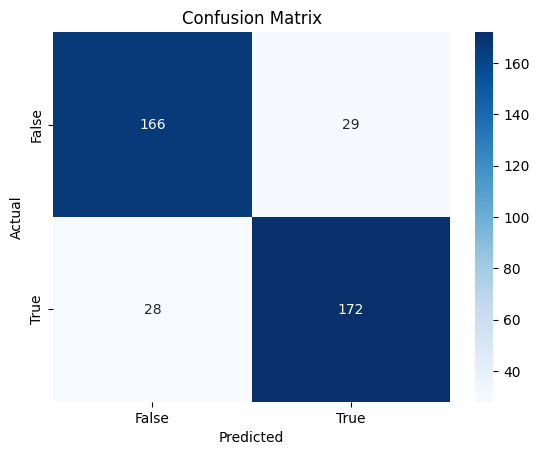

In [9]:
# 6. Train a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

# Project Plan

**Feature Selection:**  
I will keep the 'Cleaned Review' text feature transformed into TF-IDF vectors as my main feature set. I will not use the original text directly or any other columns since this dataset only contains the review text and label.

**Data Preparation Techniques:**  
- Text cleaning (lowercasing, punctuation removal, stopwords removal)  
- TF-IDF vectorization to convert text into numerical features  
- Train-test split for unbiased evaluation  
- No missing values to handle in this dataset  
- Consider balancing techniques if class imbalance becomes an issue (currently roughly balanced)

**Models to Use:**  
- Logistic Regression as the baseline model for binary classification  
- I could explore other models such as Random Forest or Support Vector Machines to compare performance.

**Model Training, Evaluation, and Improvement Plan:**  
- Train models on training data and evaluate using accuracy, precision, recall, and F1-score on the test set  
- Use confusion matrices to understand types of errors  
- Perform hyperparameter tuning (e.g., adjusting regularization in Logistic Regression)  
- Potentially use cross-validation for more robust evaluation  
- If necessary, try feature engineering like n-grams or removing rare words  
- Analyze model errors to identify improvement opportunities

This plan aims to build a classifier that generalizes well to unseen book reviews.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Random Forest Accuracy: 0.8253164556962025
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       195
           1       0.84      0.81      0.83       200

    accuracy                           0.83       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.83      0.83      0.83       395



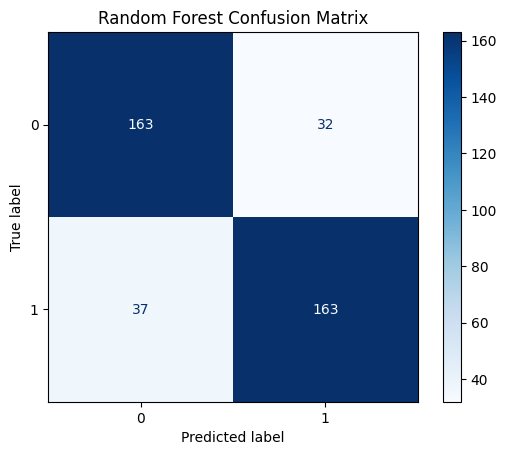

In [11]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [12]:
# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val F1 score:", grid_search.best_score_)

# Predict with best model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 10}
Best cross-val F1 score: 0.799116825182295
Test set classification report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       195
           1       0.85      0.86      0.86       200

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395



### Model Building and Evaluation

I trained two models to classify book reviews as positive or negative: a Random Forest classifier and a Logistic Regression model with hyperparameter tuning.

- The Random Forest achieved about 82.5% accuracy with balanced precision and recall, but performed slightly worse than Logistic Regression.
- Using GridSearchCV, I tuned the regularization parameter `C` for Logistic Regression and found `C=10` as the best value. This model achieved approximately 86% accuracy with balanced precision, recall, and F1-score for both classes.
- Overall, Logistic Regression with tuning outperformed Random Forest on all metrics, suggesting it is a better fit for this text classification problem.

For future work, I might explore more feature engineering (like n-grams), try other models such as SVM, or experiment with ensemble methods and neural networks to see if I can improve performance further. But for now, these results provide a solid baseline.